In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
from subprocess import check_output
print(check_output(["ls", "../../resources/prices"]).decode("utf8"))

coin_Aave.csv
coin_BinanceCoin.csv
coin_Bitcoin.csv
coin_Cardano.csv
coin_ChainLink.csv
coin_Cosmos.csv
coin_CryptocomCoin.csv
coin_Dogecoin.csv
coin_EOS.csv
coin_Ethereum.csv
coin_Iota.csv
coin_Litecoin.csv
coin_Monero.csv
coin_NEM.csv
coin_Polkadot.csv
coin_Solana.csv
coin_Stellar.csv
coin_Tether.csv
coin_Tron.csv
coin_USDCoin.csv
coin_Uniswap.csv
coin_WrappedBitcoin.csv
coin_XRP.csv



## Load and inspect data

In [3]:
eth_df = pd.read_csv(Path('../../resources/prices/coin_Ethereum.csv'), index_col='SNo')
eth_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...
2027,Ethereum,ETH,2021-02-23 23:59:59,1781.409018,1378.840907,1781.409018,1570.203925,5.202986e+10,1.802510e+11
2028,Ethereum,ETH,2021-02-24 23:59:59,1710.983795,1511.018963,1571.476497,1626.575705,3.132900e+10,1.867440e+11
2029,Ethereum,ETH,2021-02-25 23:59:59,1670.224062,1465.058946,1625.393882,1475.703735,2.448168e+10,1.694427e+11


In [4]:
eth_df['Date'] = pd.to_datetime(eth_df['Date']).dt.date
eth_df['Date'] = pd.to_datetime(eth_df['Date'])
eth_df['Spread'] = eth_df.High - eth_df.Low
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031 entries, 1 to 2031
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       2031 non-null   object        
 1   Symbol     2031 non-null   object        
 2   Date       2031 non-null   datetime64[ns]
 3   High       2031 non-null   float64       
 4   Low        2031 non-null   float64       
 5   Open       2031 non-null   float64       
 6   Close      2031 non-null   float64       
 7   Volume     2031 non-null   float64       
 8   Marketcap  2031 non-null   float64       
 9   Spread     2031 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 174.5+ KB


## Plot the closing value of ETH over time

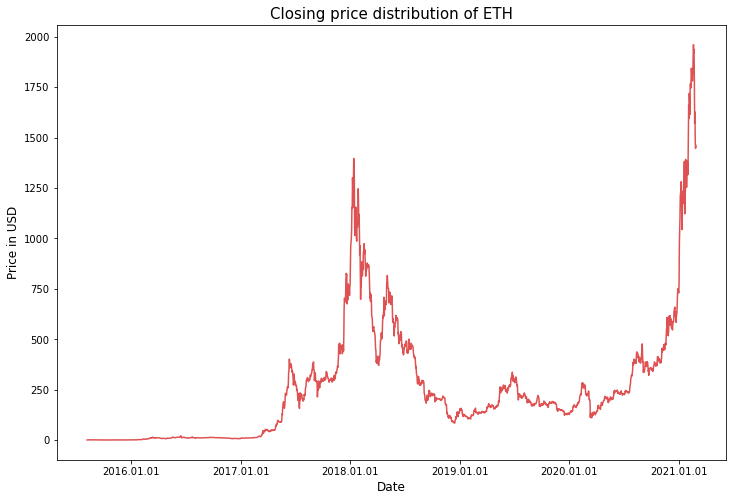

In [5]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = eth_df.Close.values, x=eth_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = eth_df.Close.values, x=eth_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of ETH", fontsize=15)
plt.show()

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

eth_df['Date_mpl'] = eth_df['Date'].apply(lambda x: mdates.date2num(x))

temp_eth_df = eth_df.copy(deep=False)
temp_eth_df = temp_eth_df.set_index(['Date'])
temp_eth_df = temp_eth_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_eth_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2015-08-08,2.798810,0.714725,2.793760,0.753325,6.741880e+05,16655.0
2015-08-09,0.879810,0.629191,0.706136,0.701897,5.321700e+05,16656.0
2015-08-10,0.729854,0.636546,0.713989,0.708448,4.052830e+05,16657.0
2015-08-11,1.131410,0.663235,0.708087,1.067860,1.463100e+06,16658.0
2015-08-12,1.289940,0.883608,1.058750,1.217440,2.150620e+06,16659.0
...,...,...,...,...,...,...
2021-02-23,1781.409018,1378.840907,1781.409018,1570.203925,5.202986e+10,18681.0
2021-02-24,1710.983795,1511.018963,1571.476497,1626.575705,3.132900e+10,18682.0
2021-02-25,1670.224062,1465.058946,1625.393882,1475.703735,2.448168e+10,18683.0


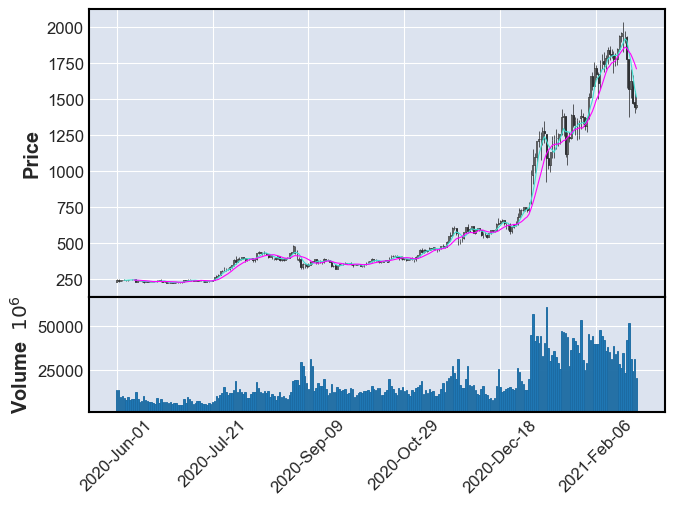

In [7]:
mpf.plot(temp_eth_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Price prediction

In [8]:
from fbprophet import Prophet

In [9]:
INPUT_FILE = "coin_Ethereum.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']

m = Prophet(changepoint_prior_scale=.7)
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
274,2021-03-02 23:59:59,1933.673077,1838.398500,2024.346093
275,2021-03-03 23:59:59,1953.537307,1860.582088,2056.667598
276,2021-03-04 23:59:59,1960.518026,1863.056522,2055.112608
277,2021-03-05 23:59:59,1978.735956,1883.233295,2073.849476
278,2021-03-06 23:59:59,1993.171946,1889.050730,2086.080779


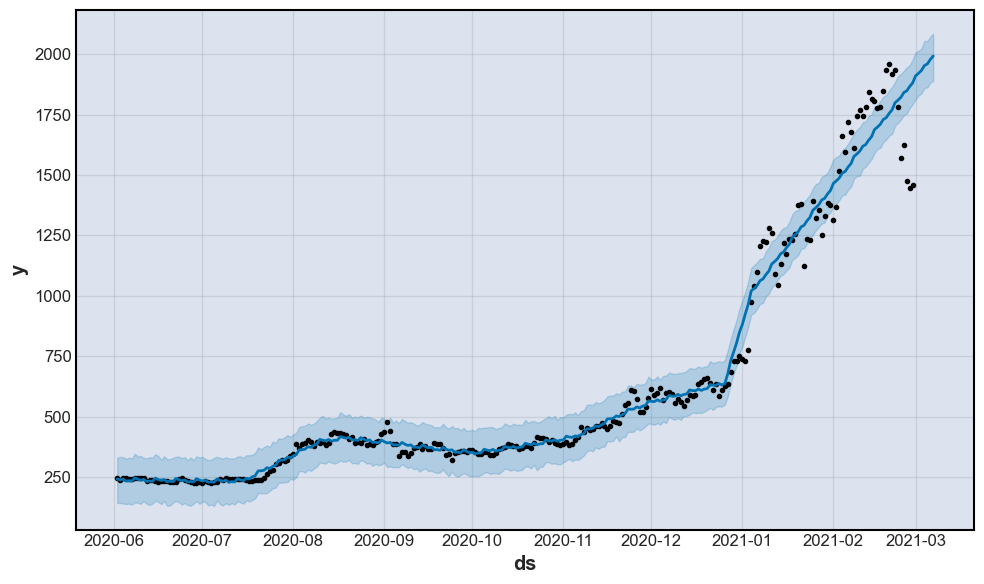

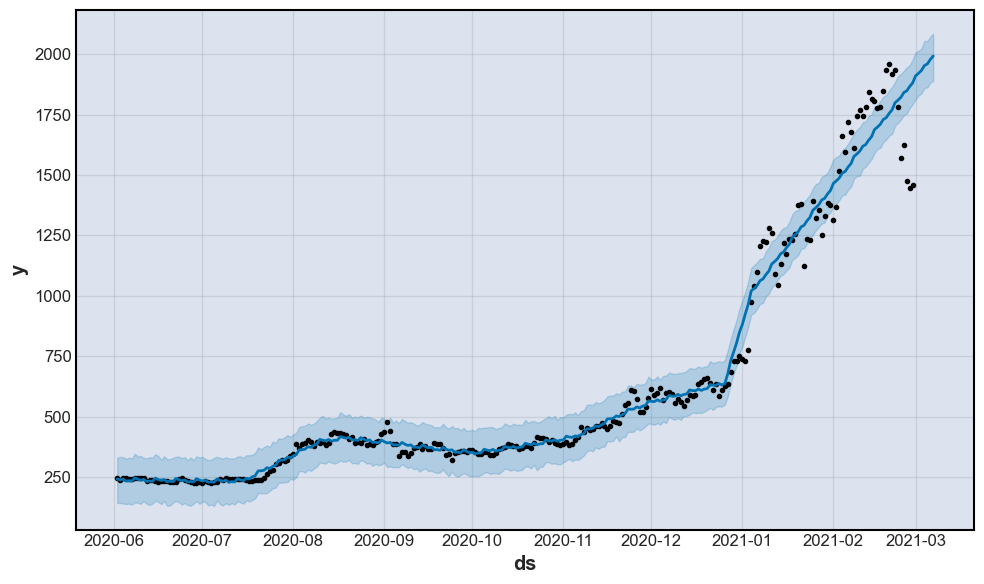

In [10]:
m.plot(forecast)

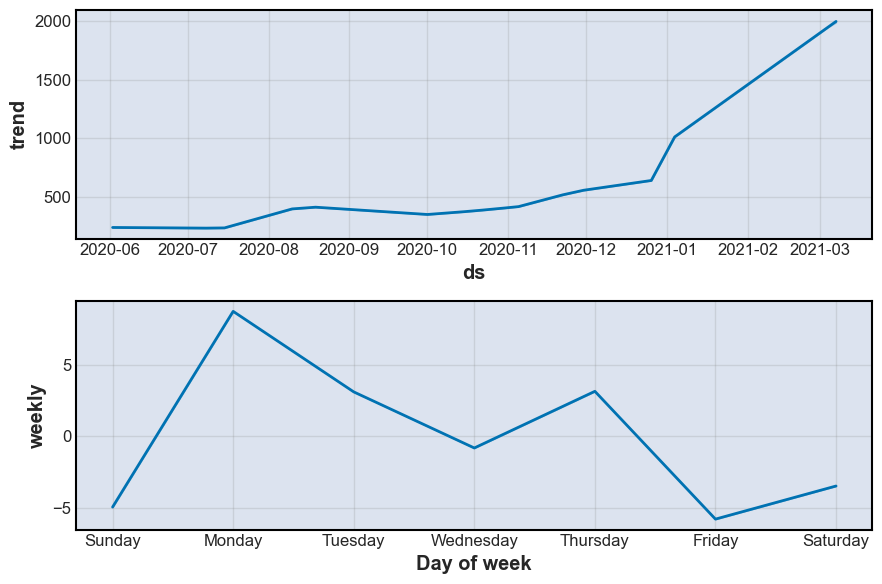

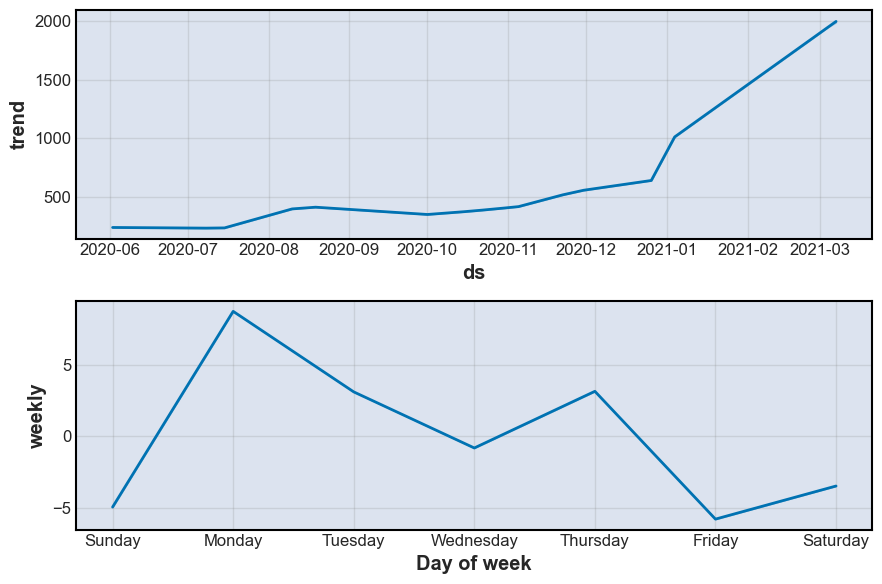

In [11]:
m.plot_components(forecast)